In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>
1. Chaotic network (Sompolinsky, Crisanti, & Sommers (1988). Chaos in Random Neural Networks. Physical Review Letters)<br>
2. Ring attractor network (Ben Yishai et al. (1995). Theory of orientation tuning in visual cortex. PNAS)<br>
3. Rank 1 network (Mastrogiuseppe & Ostojic (2018). Linking Connectivity, Dynamics, and Computations in Low-Rank Recurrent Neural Networks. Neuron)<br>
4. Successor representation (Dayan (1993). Improving Generalization for Temporal Difference Learning: The Successor Representation. Neural Computation)
</h3>

## Dynamics

### $ \qquad \qquad \qquad \frac{dv_i}{dt} = -v_i + g \sum_j J_{ij} \tanh (v_j),  \qquad J_{ij} \sim \mathcal{N}(0,\frac{1}{N}) $   


In [2]:
# Number of neurons
N = 100

### Weight matrices

In [3]:
# Chaotic network 
W_chaos = np.random.randn(N,N) * np.sqrt(1/N)

# Ring attractor network 
th = np.linspace(0, 2 * np.pi, N, endpoint=False)   # Preferred firing location (angle)
J1 = 1.0
J0 = 0.5
W_ring = (J1 * np.cos(th[:, None] - th[None, :]) + J0) / N   # Synaptic weight matrix


# Rank 1 network 
u1 = np.random.rand(N)
u2 = np.random.rand(N)

W_rank1 = np.outer(u1,u2)


# Successor Representation
T = np.eye(N, k=1)
gamma = 0.98
W_sr = np.linalg.inv(np.eye(N) - gamma*T)


## All weight matrices

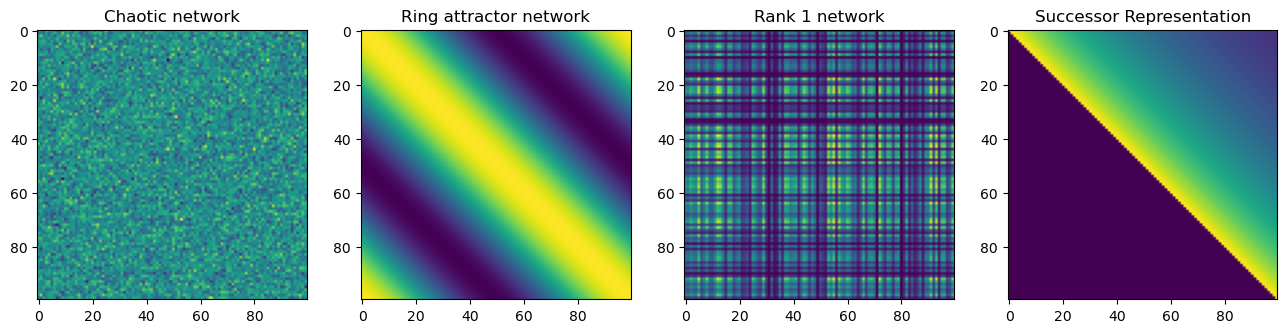

In [4]:
fig, ax = plt.subplots(1,4,figsize = (16,4))

ax[0].imshow(W_chaos)
ax[0].set_title('Chaotic network')

ax[1].imshow(W_ring)
ax[1].set_title('Ring attractor network')

ax[2].imshow(W_rank1)
ax[2].set_title('Rank 1 network')

ax[3].imshow(W_sr)
ax[3].set_title('Successor Representation')

plt.show()

In [5]:
def run_dynamics(v, J, g, tau, Iext, dt=0.1):
    N, T = v.shape

    for ii in range(T-1):
        v[:,ii+1] = v[:,ii] + (-v[:,ii] + g * J @ np.tanh(v[:,ii])+Iext[:,ii])*dt/tau

    return v

In [111]:
t = 1000
tau = 1
v = np.zeros((N,t))
v[:,0] = np.random.rand(N)

g = 7

Iext = np.zeros((N,t))
# Iext = np.tile(np.sin(np.linspace(0, 2*np.pi*5, t)), (N, 1))

v = run_dynamics(v,W_chaos,g,tau,Iext*5)


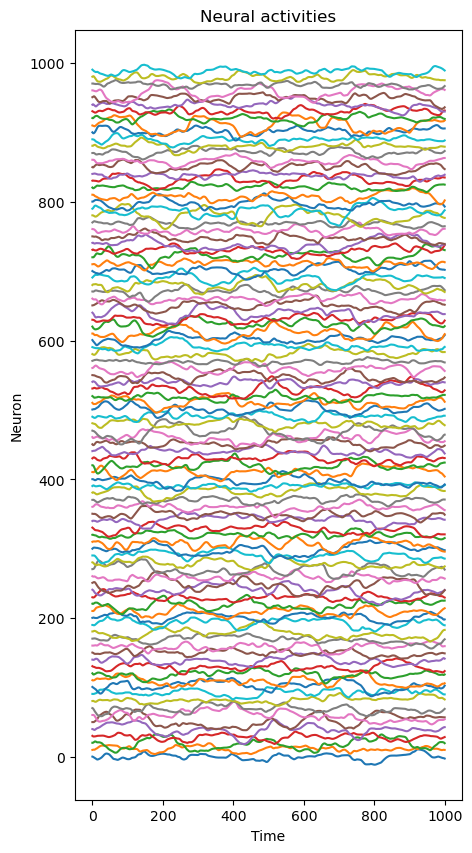

In [112]:
plt.subplots(figsize=(5,10))
plt.plot((v + 10 * np.arange(N)[:, None]).T)
plt.title('Neural activities')
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.show()

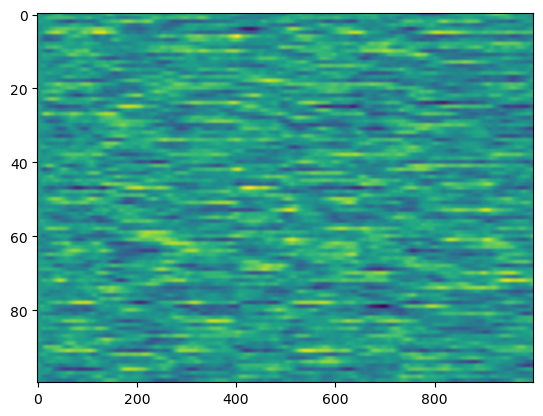

In [117]:
plt.imshow(v,aspect='auto')

In [118]:
np.linalg.matrix_rank(W_chaos, tol=1e-10)

np.int64(100)

## Dynamics with External Inputs

### $ \qquad \qquad \qquad \frac{dv_i}{dt} = -v_i + g \sum_j J_{ij} \tanh (v_j) + u_i A \cos(\omega t),  \qquad J_{ij} \sim \mathcal{N}(0,\frac{1}{N}) $   

<h3>
5. Chaotic network with external inputs (Rajan, Abbott & Sompolinsky (2010). Chaos in Random Neural Networks. Physical Review Letters)<br>
</h3>

In [135]:
v = np.zeros((N,t))
v[:,0] = np.random.rand(N)

g = 7

u = 2 * np.random.rand(N, 1) - 1

omega = 5
A = 20

Iext = u * A * np.cos(np.linspace(0, 2*np.pi*omega, t))[None, :]
v = run_dynamics(v,W_chaos,g,tau,Iext)

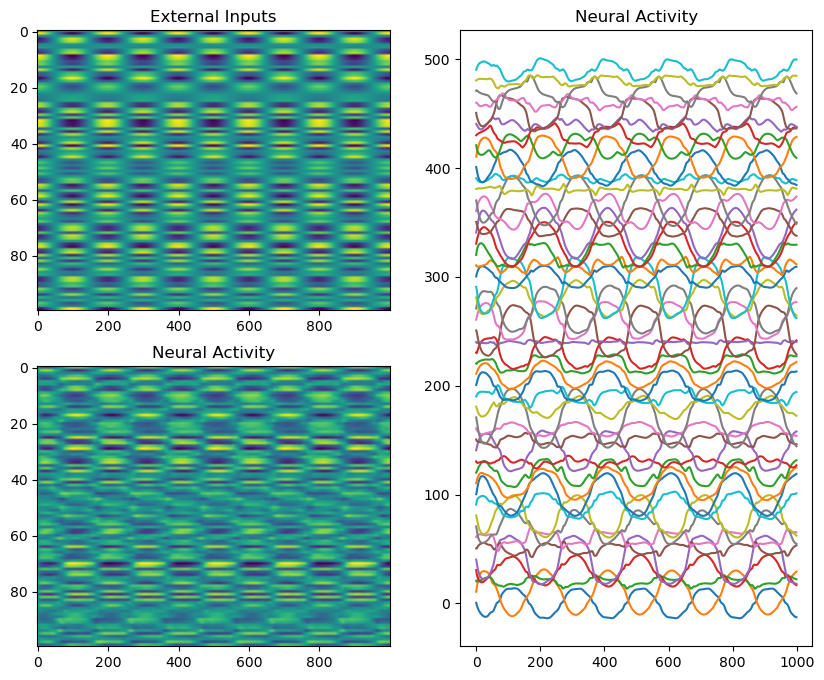

In [136]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(Iext,aspect='auto')
ax1.set_title('External Inputs')

ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(v,aspect='auto')
ax2.set_title('Neural Activity')

ax3 = fig.add_subplot(gs[:, 1])
ax3.plot((v[:50] + 10 * np.arange(N/2)[:, None]).T)
ax3.set_title('Neural Activity')
plt.show()


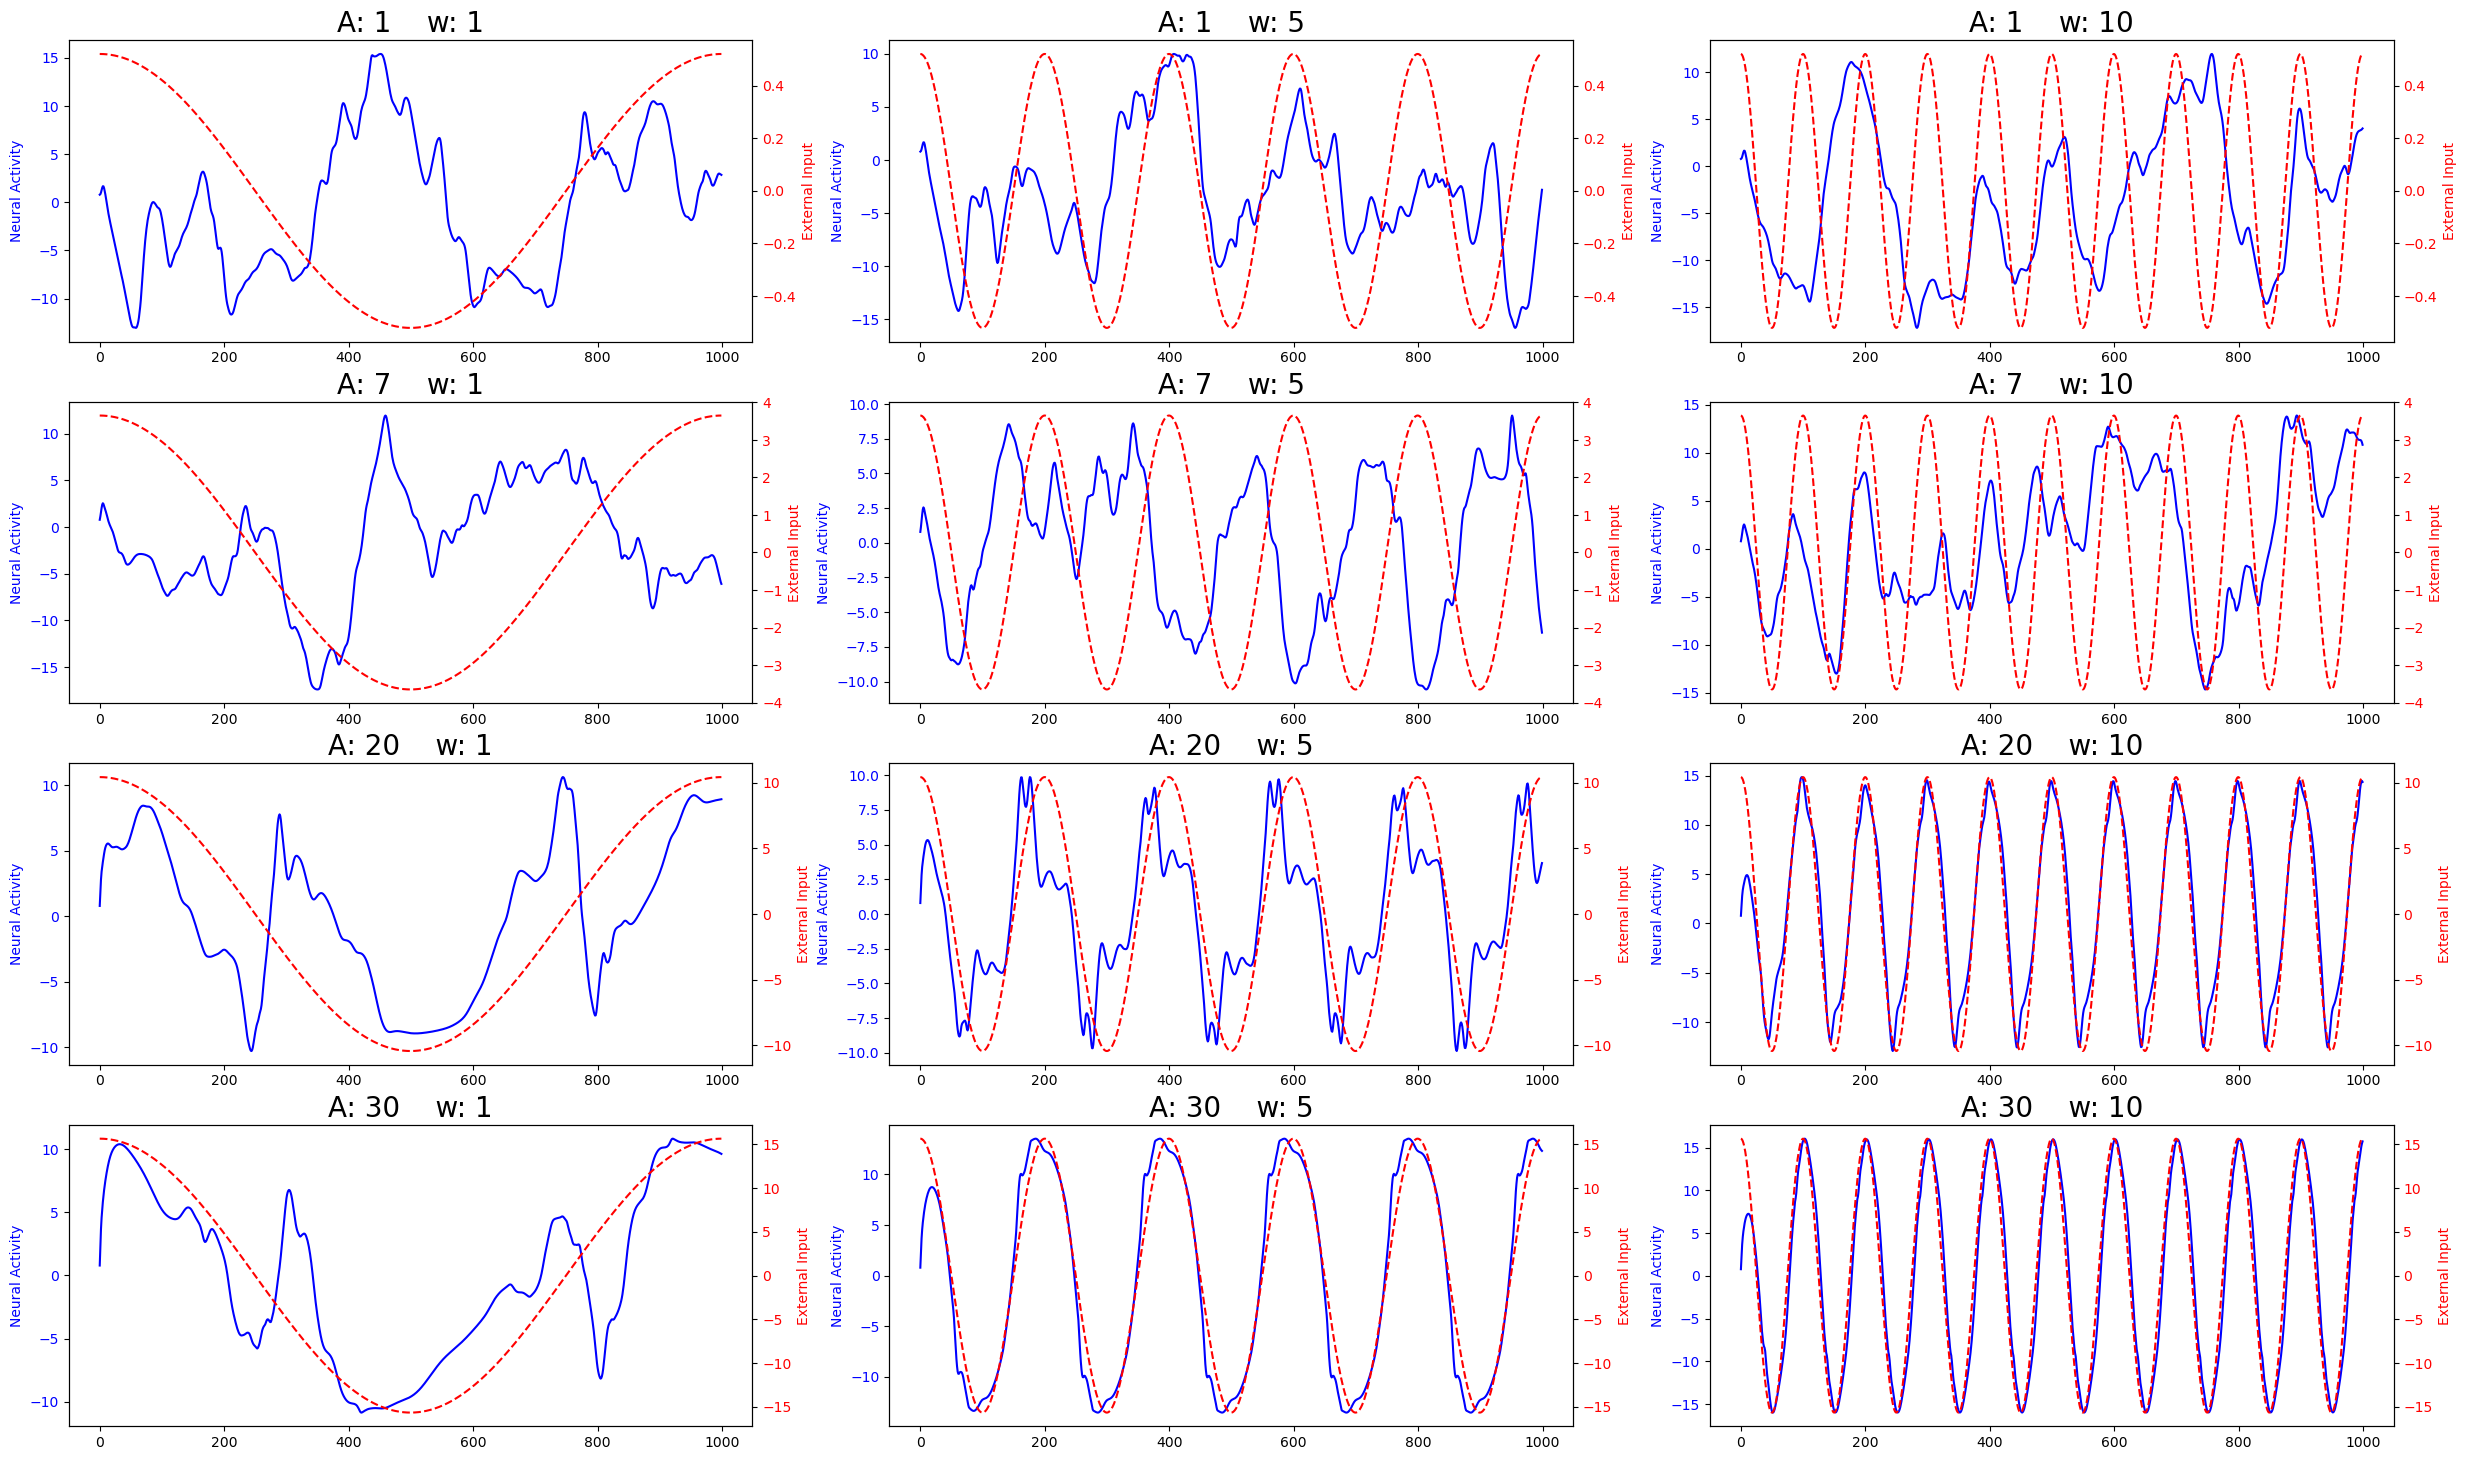

In [ ]:
t = 1000
tau = 1
v = np.zeros((N,t))
v[:,0] = np.random.rand(N)

g = 7

u = 2 * np.random.rand(N, 1) - 1

omega = np.array([1,5,10])
A = np.array([1,7,20,30])

fig, ax = plt.subplots(len(A),len(omega),figsize=(30,18))

for ii in range(len(omega)):
    for jj in range(len(A)):
        Iext = u * A[jj] * np.cos(np.linspace(0, 2*np.pi*omega[ii], t))[None, :]
        v = run_dynamics(v,W_chaos,g,tau,Iext)

        # Left y-axis (like yyaxis left)
        ax[jj,ii].plot(v[2,:], 'b-', label='sin(x)')
        ax[jj,ii].set_ylabel('Neural Activity', color='b')
        ax[jj,ii].tick_params(axis='y', labelcolor='b')
        ax[jj,ii].set_title(f'A: {A[jj]}    w: {omega[ii]}',fontsize=20)


        # Right y-axis (like yyaxis right)
        ax2 = ax[jj,ii].twinx()  
        ax2.plot(Iext[2,:], 'r--', label='exp(0.3x)')
        ax2.set_ylabel('External Input', color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        
